<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/Precipitation_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

###Importing Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru_data.csv")
data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,27,11,0,49,0.0,1012,22,10,20,10
1,2009-01-01 01:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,12,0,50,0.0,1012,22,10,18,11
2,2009-01-01 02:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,14,0,50,0.0,1012,22,10,16,12
3,2009-01-01 03:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,25,15,0,50,0.0,1012,22,10,14,13
4,2009-01-01 04:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,14,0,49,0.0,1013,22,10,28,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,27,24,0.0,11.0,7,6,37,11:38 AM,11:36 PM,...,25,16,4,64,0.0,1014,25,10,324,14
96428,2020-01-01 20:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,25,15,4,65,0.0,1015,25,10,330,13
96429,2020-01-01 21:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,25,14,4,67,0.0,1015,25,10,335,13
96430,2020-01-01 22:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,25,13,4,66,0.0,1015,25,10,301,12


###Exploratory Data Analysis

In [3]:
data.isnull().sum()

,0
date_time,0
maxtempC,0
mintempC,0
totalSnow_cm,0
sunHour,0
uvIndex,0
uvIndex.1,0
moon_illumination,0
moonrise,0
moonset,0


In [4]:
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,27,11,0,49,0.0,1012,22,10,20,10
1,2009-01-01 01:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,12,0,50,0.0,1012,22,10,18,11
2,2009-01-01 02:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,14,0,50,0.0,1012,22,10,16,12
3,2009-01-01 03:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,25,15,0,50,0.0,1012,22,10,14,13
4,2009-01-01 04:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,14,0,49,0.0,1013,22,10,28,12


In [5]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)
data.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,30.761075,24.917870,0.0,10.756371,6.691389,4.289831,46.094077,21.774618,32.819541,32.873776,29.097810,16.417144,24.856593,66.708914,0.152278,1009.399567,27.528414,9.748247,213.206882,11.799973
std,2.196361,2.471196,0.0,1.525822,0.626155,3.077436,31.249725,3.854042,4.554669,4.465167,2.879104,10.169945,28.987203,15.997022,0.586189,3.750589,2.889144,1.077000,98.703720,6.034329
min,24.000000,17.000000,0.0,5.700000,5.000000,1.000000,0.000000,1.000000,17.000000,18.000000,17.000000,0.000000,0.000000,20.000000,0.000000,996.000000,0.000000,2.000000,0.000000,0.000000
25%,29.000000,23.000000,0.0,11.000000,6.000000,1.000000,18.000000,19.000000,30.000000,30.000000,27.000000,10.000000,1.000000,54.000000,0.000000,1007.000000,26.000000,10.000000,147.000000,8.000000
50%,31.000000,25.000000,0.0,11.500000,7.000000,6.000000,46.000000,23.000000,32.000000,32.000000,29.000000,14.000000,9.000000,68.000000,0.000000,1010.000000,27.000000,10.000000,240.000000,11.000000
75%,32.000000,27.000000,0.0,11.600000,7.000000,7.000000,73.000000,25.000000,35.000000,35.000000,31.000000,20.000000,47.000000,81.000000,0.000000,1012.000000,29.000000,10.000000,288.000000,15.000000
max,38.000000,31.000000,0.0,13.200000,8.000000,9.000000,100.000000,31.000000,58.000000,58.000000,43.000000,85.000000,100.000000,96.000000,22.500000,1020.000000,38.000000,20.000000,360.000000,47.000000


In [6]:
cd = data.copy()

In [7]:
numeric_columns = cd.select_dtypes(include=[np.number]).columns
cd.index = pd.to_datetime(cd.index)
cd['date'] = cd.index.date

In [8]:
daily_rain_data = cd[numeric_columns].groupby(cd['date'])['precipMM'].sum()
daily_rain_data.head()

,precipMM
date,
2009-01-01,0.0
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0


In [9]:
daily_data = cd[numeric_columns].groupby(cd['date']).mean()
daily_data['precipMM'] = daily_rain_data
daily_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,,
2009-01-01,30.0,22.0,0.0,11.0,7.0,4.125000,31.0,15.250000,29.291667,29.333333,28.833333,12.625000,0.208333,44.708333,0.0,1012.416667,25.416667,10.0,145.666667,10.500000
2009-01-02,30.0,23.0,0.0,11.0,7.0,4.166667,38.0,16.916667,29.875000,29.875000,28.708333,10.875000,2.333333,49.333333,0.0,1013.208333,25.541667,10.0,144.416667,8.833333
2009-01-03,29.0,22.0,0.0,11.0,7.0,4.166667,45.0,18.375000,29.208333,29.208333,27.708333,9.250000,4.375000,57.625000,0.0,1014.500000,25.583333,10.0,170.041667,7.625000
2009-01-04,29.0,23.0,0.0,11.0,7.0,4.208333,52.0,19.125000,29.500000,29.500000,27.833333,11.666667,3.791667,59.583333,0.0,1013.458333,25.791667,10.0,133.750000,9.708333
2009-01-05,29.0,22.0,0.0,11.0,7.0,4.125000,60.0,18.166667,28.833333,28.833333,27.583333,11.666667,2.041667,57.333333,0.0,1011.833333,25.000000,10.0,208.583333,10.166667


In [10]:
cd = daily_data.copy()
cd.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,,
2009-01-01,30.0,22.0,0.0,11.0,7.0,4.125000,31.0,15.250000,29.291667,29.333333,28.833333,12.625000,0.208333,44.708333,0.0,1012.416667,25.416667,10.0,145.666667,10.500000
2009-01-02,30.0,23.0,0.0,11.0,7.0,4.166667,38.0,16.916667,29.875000,29.875000,28.708333,10.875000,2.333333,49.333333,0.0,1013.208333,25.541667,10.0,144.416667,8.833333
2009-01-03,29.0,22.0,0.0,11.0,7.0,4.166667,45.0,18.375000,29.208333,29.208333,27.708333,9.250000,4.375000,57.625000,0.0,1014.500000,25.583333,10.0,170.041667,7.625000
2009-01-04,29.0,23.0,0.0,11.0,7.0,4.208333,52.0,19.125000,29.500000,29.500000,27.833333,11.666667,3.791667,59.583333,0.0,1013.458333,25.791667,10.0,133.750000,9.708333
2009-01-05,29.0,22.0,0.0,11.0,7.0,4.125000,60.0,18.166667,28.833333,28.833333,27.583333,11.666667,2.041667,57.333333,0.0,1011.833333,25.000000,10.0,208.583333,10.166667


In [11]:
cd.drop(['totalSnow_cm'], axis=1, inplace=True)
cd.head()

,maxtempC,mintempC,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,
2009-01-01,30.0,22.0,11.0,7.0,4.125000,31.0,15.250000,29.291667,29.333333,28.833333,12.625000,0.208333,44.708333,0.0,1012.416667,25.416667,10.0,145.666667,10.500000
2009-01-02,30.0,23.0,11.0,7.0,4.166667,38.0,16.916667,29.875000,29.875000,28.708333,10.875000,2.333333,49.333333,0.0,1013.208333,25.541667,10.0,144.416667,8.833333
2009-01-03,29.0,22.0,11.0,7.0,4.166667,45.0,18.375000,29.208333,29.208333,27.708333,9.250000,4.375000,57.625000,0.0,1014.500000,25.583333,10.0,170.041667,7.625000
2009-01-04,29.0,23.0,11.0,7.0,4.208333,52.0,19.125000,29.500000,29.500000,27.833333,11.666667,3.791667,59.583333,0.0,1013.458333,25.791667,10.0,133.750000,9.708333
2009-01-05,29.0,22.0,11.0,7.0,4.125000,60.0,18.166667,28.833333,28.833333,27.583333,11.666667,2.041667,57.333333,0.0,1011.833333,25.000000,10.0,208.583333,10.166667


####Rainfall, Min Temp and Max Temp Over Time

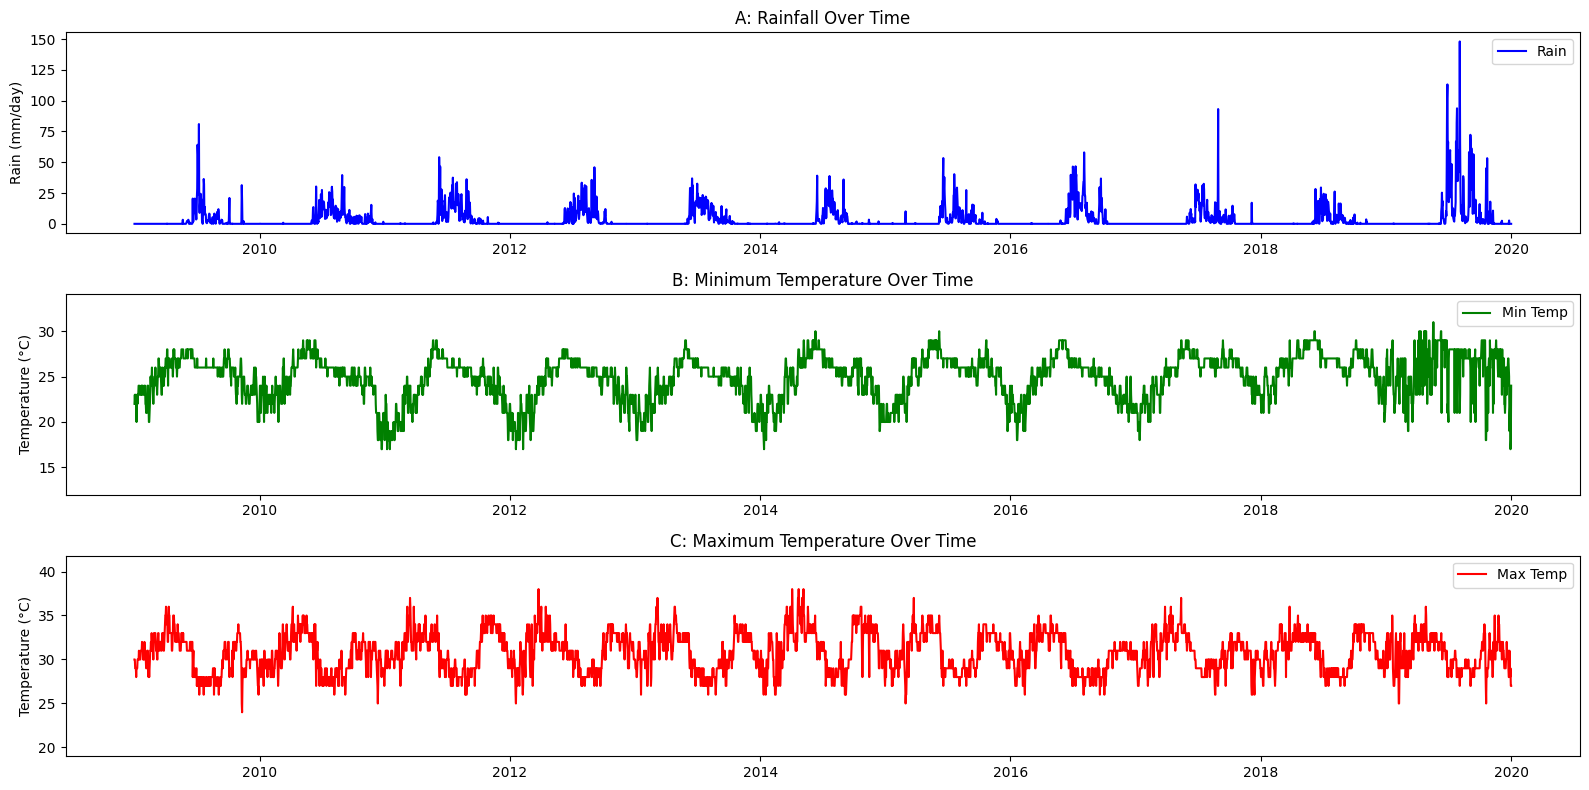

In [12]:
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(cd.index, cd['precipMM'], label='Rain', color='blue')
plt.title('A: Rainfall Over Time')
plt.ylabel('Rain (mm/day)')
plt.legend()
#plt.ylim([0, cd['precipMM'].max() * 1.3])

plt.subplot(3, 1, 2)
plt.plot(cd.index, cd['mintempC'], label='Min Temp', color='green')
plt.title('B: Minimum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([cd['mintempC'].min() - 5, cd['mintempC'].max() * 1.1])

plt.subplot(3, 1, 3)
plt.plot(cd.index, cd['maxtempC'], label='Max Temp', color='red')
plt.title('C: Maximum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([cd['maxtempC'].min() - 5, cd['maxtempC'].max() * 1.1])

plt.tight_layout()
plt.show()

####Average Monthly Rainfall(June-Sept)

In [13]:
cd['date_time'] = pd.to_datetime(cd.index)

<ipython-input-14-716796e5fac2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_filtered['year'] = cd_filtered['date_time'].dt.year
<ipython-input-14-716796e5fac2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_filtered['month'] = cd_filtered['date_time'].dt.month


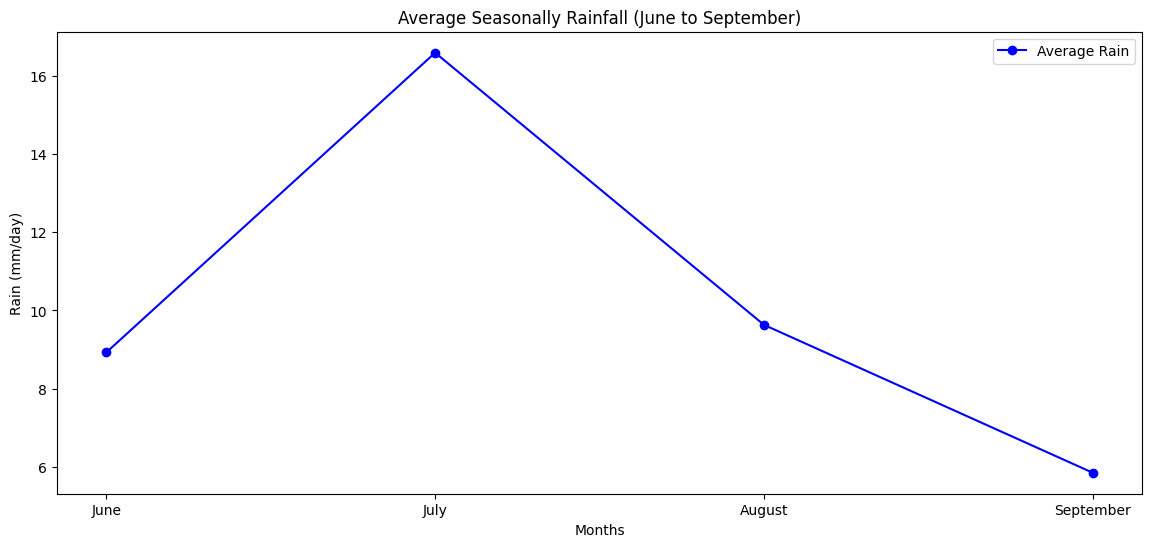

In [14]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd_filtered = cd[cd['date_time'].dt.month.isin([6, 7, 8, 9])]

cd_filtered['year'] = cd_filtered['date_time'].dt.year
cd_filtered['month'] = cd_filtered['date_time'].dt.month
monthly_avg = cd_filtered.groupby('month')['precipMM'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label='Average Rain', color='blue', marker='o')
plt.title('Average Seasonally Rainfall (June to September)')
plt.xlabel('Months')
plt.ylabel('Rain (mm/day)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend()
plt.show()

####Yearly Average Rainfall(June-Sept)

In [15]:
cd_filtered.loc[:, 'year'] = cd_filtered['date_time'].dt.year
yearly_avg = cd_filtered.groupby('year')['precipMM'].mean().reset_index()
fig = px.line(yearly_avg, x='year', y='precipMM', title='Yearly Average Rainfall (June to September)',
              labels={'year': 'Year', 'precipMM': 'Average Rain (mm/day)'}, markers=True)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Rain (mm/day)',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

####Average Anuual Rainfall

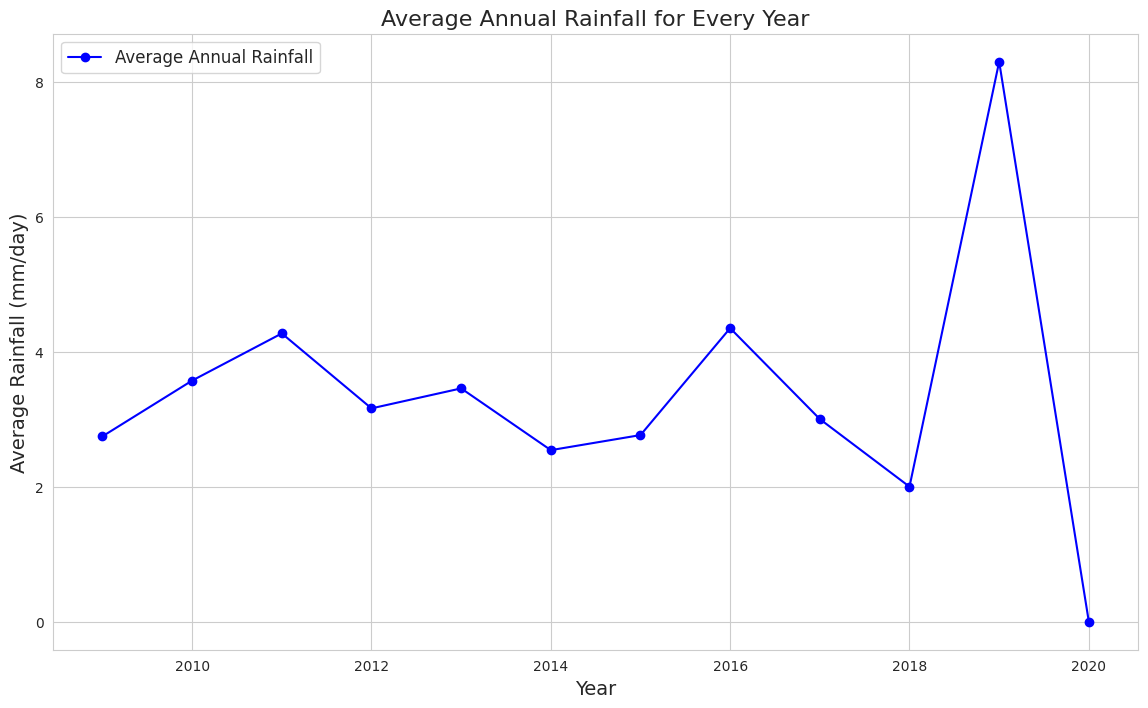

In [16]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd['year'] = cd['date_time'].dt.year
annual_rainfall = cd.groupby('year')['precipMM'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.plot(annual_rainfall['year'], annual_rainfall['precipMM'], marker='o', linestyle='-', color='blue', label='Average Annual Rainfall')

plt.title('Average Annual Rainfall for Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm/day)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

####Monthly Trend Plots

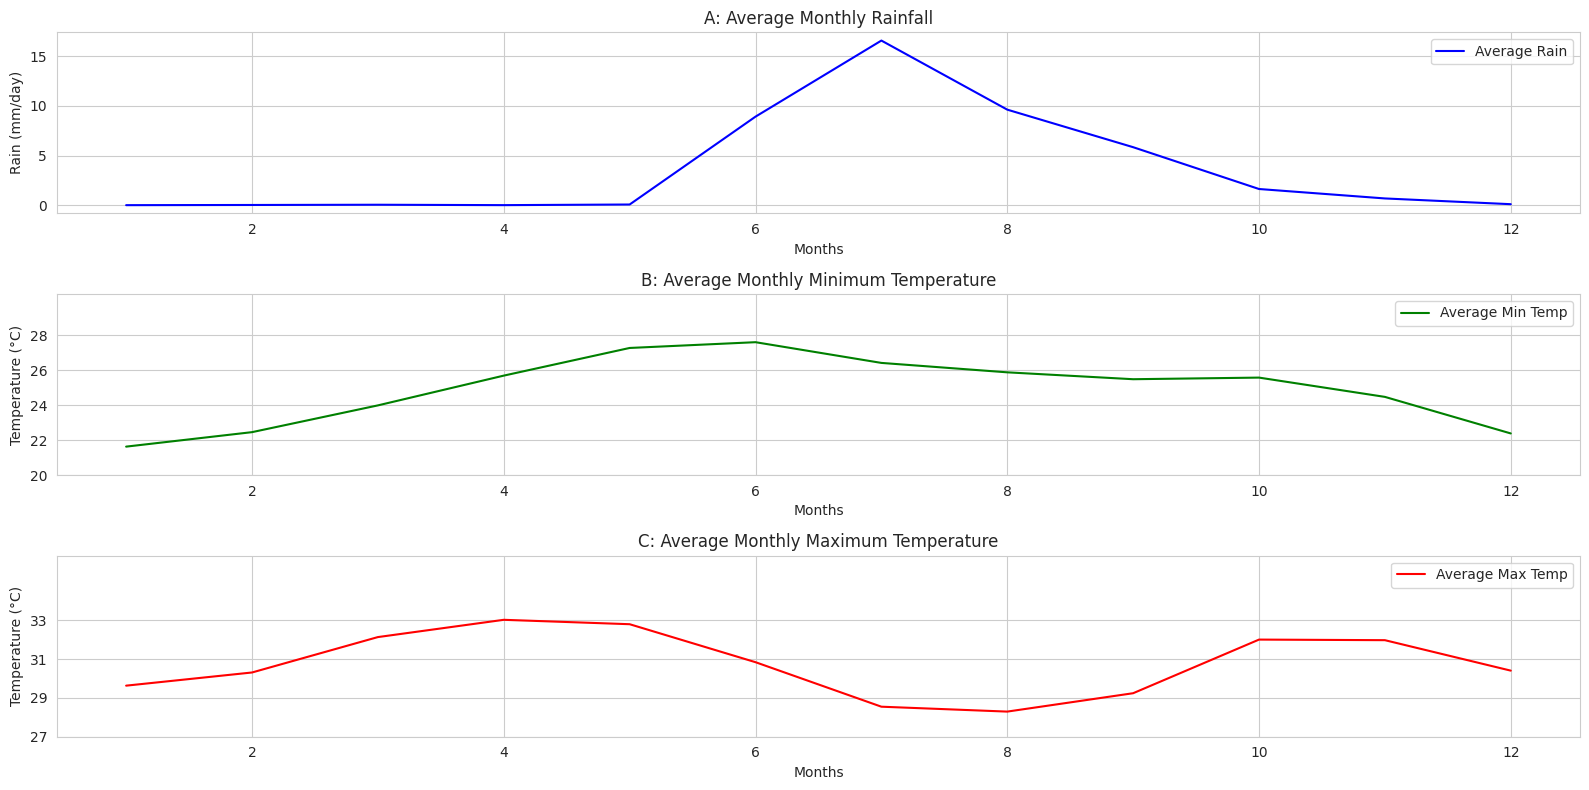

In [17]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd.set_index('date_time', inplace=True)
cd['Year'] = cd.index.year
cd['Month'] = cd.index.month
numeric_columns = cd.select_dtypes(include=[np.number]).columns
monthly_avg = cd[numeric_columns].groupby(cd['Month']).mean()
yearly_avg = cd[numeric_columns].groupby(cd['Year']).mean()
cd.reset_index(inplace=True)

plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['precipMM'], label='Average Rain', color='blue')
plt.title('A: Average Monthly Rainfall')
plt.xlabel('Months')
plt.ylabel('Rain (mm/day)')
plt.legend()
#plt.ylim([0, monthly_avg['precipMM'].max() * 1.2])

plt.subplot(3, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['mintempC'], label='Average Min Temp', color='green')
plt.title('B: Average Monthly Minimum Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([monthly_avg['mintempC'].min() - 1, monthly_avg['mintempC'].max() * 1.1])
plt.yticks(range(int(monthly_avg['mintempC'].min()) - 1, int(monthly_avg['mintempC'].max()) + 2, 2))

plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg['maxtempC'], label='Average Max Temp', color='red')
plt.title('C: Average Monthly Maximum Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([monthly_avg['maxtempC'].min() - 1, monthly_avg['maxtempC'].max() * 1.1])
plt.yticks(range(int(monthly_avg['maxtempC'].min()) - 1, int(monthly_avg['maxtempC'].max()) + 2, 2))

plt.tight_layout()
plt.show()

####Yearly Trend Plots

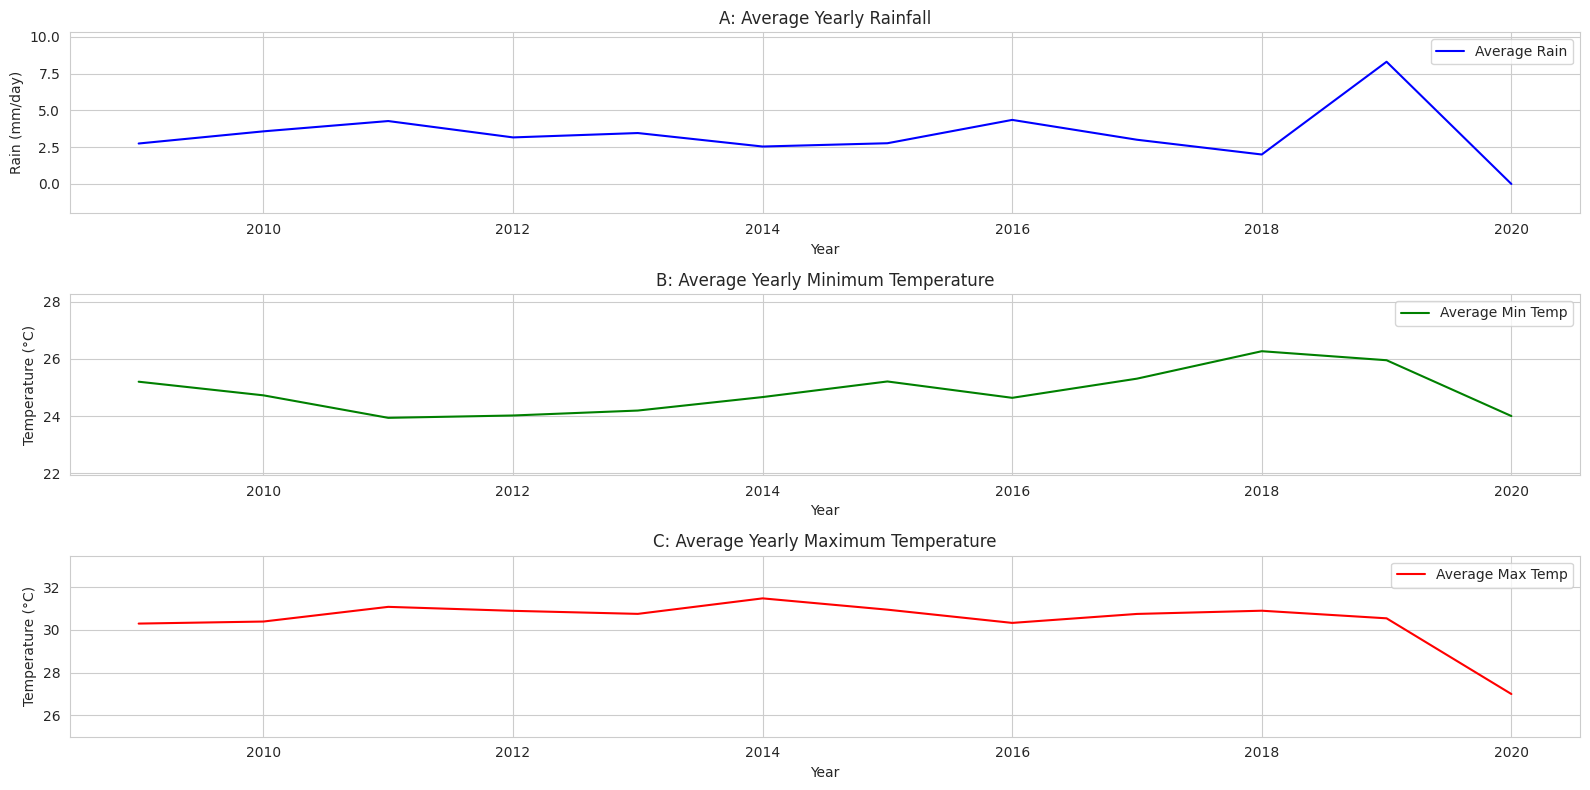

In [18]:
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(yearly_avg.index, yearly_avg['precipMM'], label='Average Rain', color='blue')
plt.title('A: Average Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rain (mm/day)')
plt.ylim(yearly_avg['precipMM'].min() - 2, yearly_avg['precipMM'].max() + 2)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(yearly_avg.index, yearly_avg['mintempC'], label='Average Min Temp', color='green')
plt.title('B: Average Yearly Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.ylim(yearly_avg['mintempC'].min() - 2, yearly_avg['mintempC'].max() + 2)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(yearly_avg.index, yearly_avg['maxtempC'], label='Average Max Temp', color='red')
plt.title('C: Average Yearly Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.ylim(yearly_avg['maxtempC'].min() - 2, yearly_avg['maxtempC'].max() + 2)
plt.legend()

plt.tight_layout()
plt.show()

####Plotting Features in Dataset

<Figure size 1600x1200 with 0 Axes>

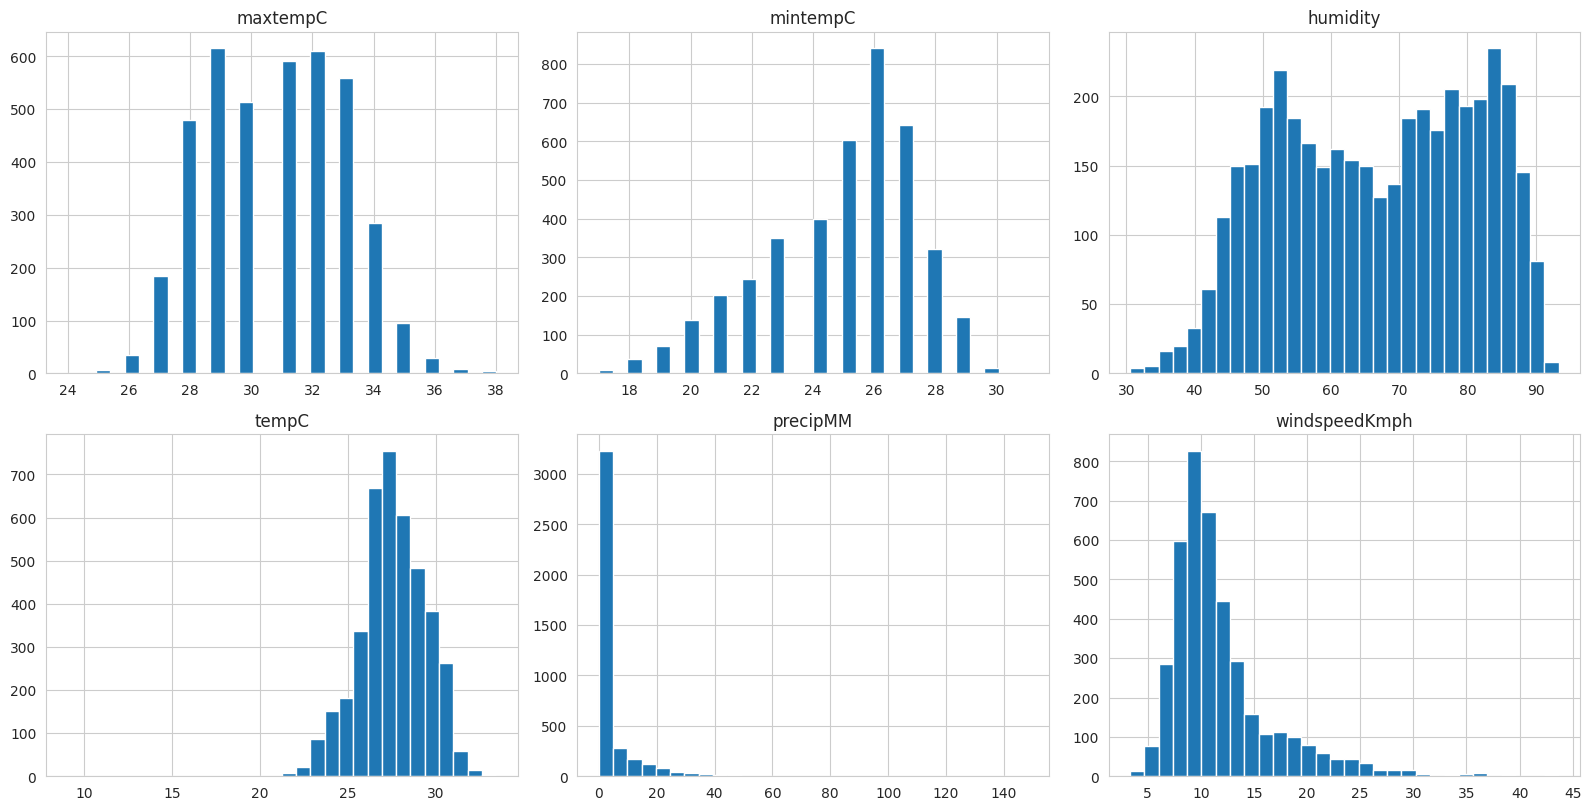

In [19]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
plt.figure(figsize=(16, 12))
columns_of_interest = ['maxtempC', 'mintempC', 'humidity', 'tempC', 'precipMM', 'windspeedKmph']
cd[columns_of_interest].hist(bins=30, figsize=(16, 12), layout=(3, 3))
plt.tight_layout()
plt.show()


####Correlation Matrix

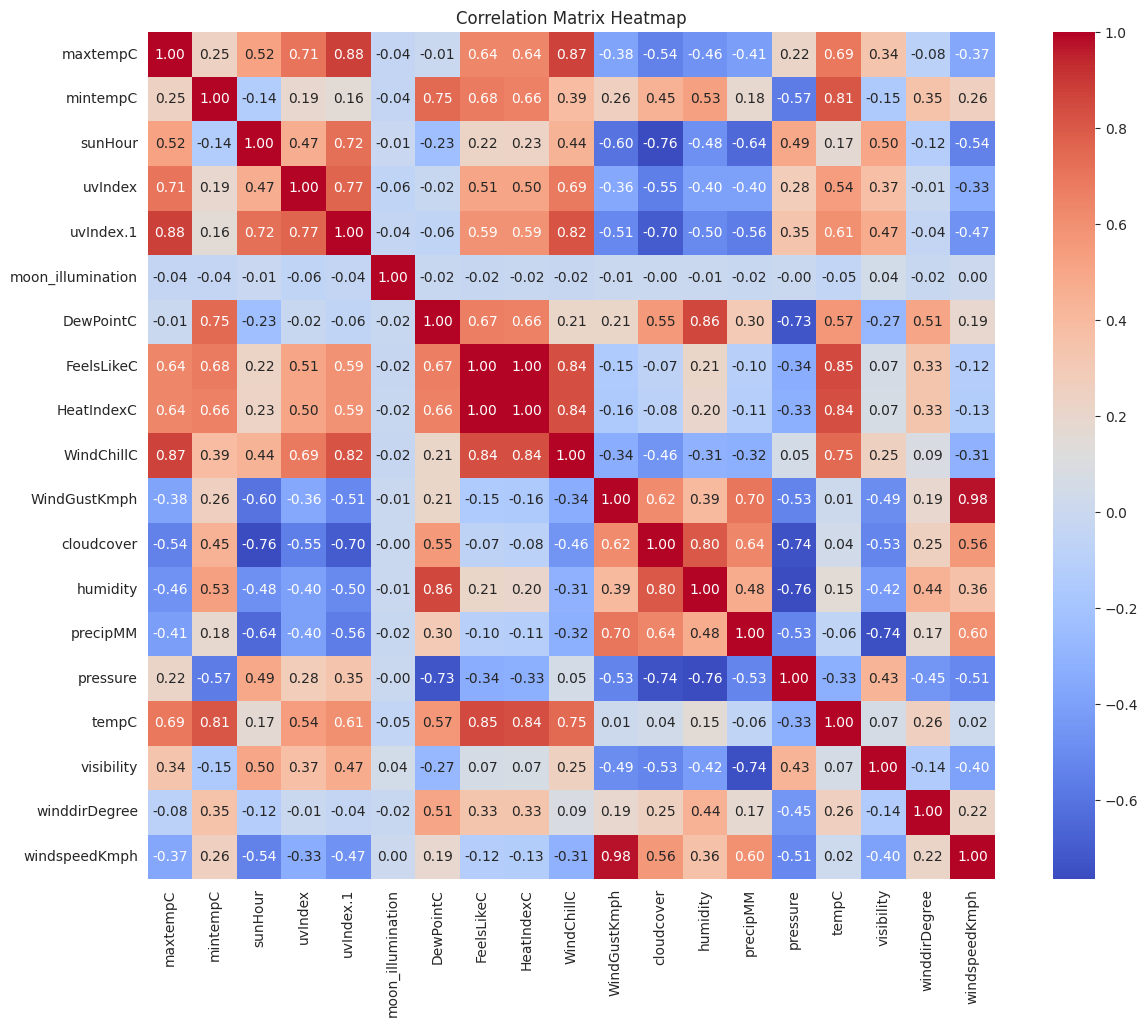

In [20]:
corrdf = cd.drop(['date_time','year', 'Year', 'Month'], axis=1)
correlation_matrix = corrdf.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

####Daily, Monthly and Yearly Average of Temp and Humidity

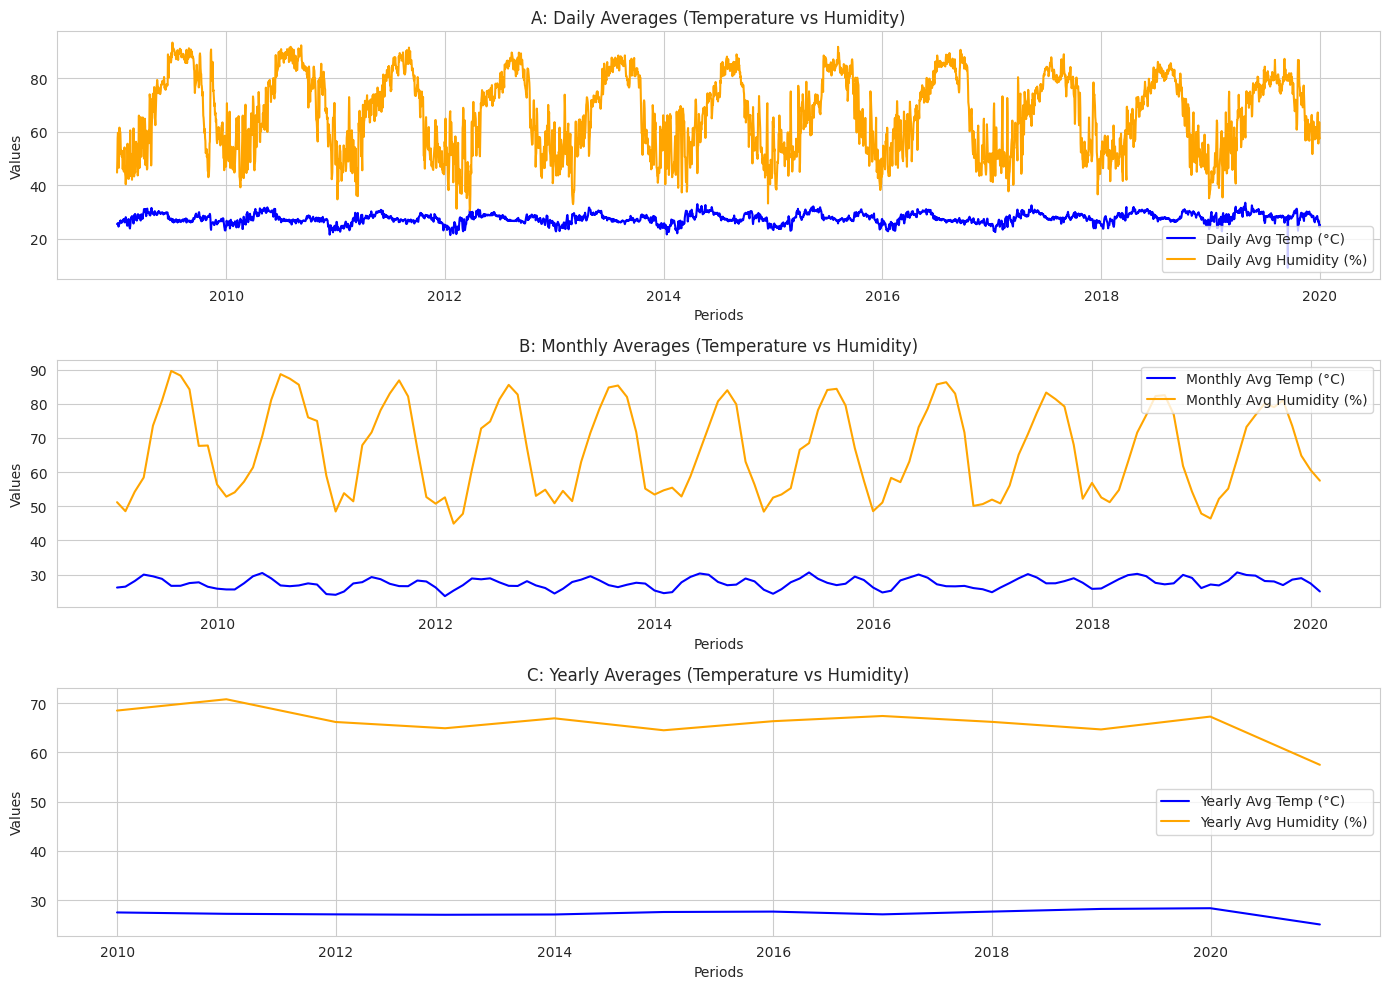

In [21]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd.set_index('date_time', inplace=True)
daily_data = cd.resample('D').mean()
monthly_data = cd.resample('M').mean()
yearly_data = cd.resample('Y').mean()
plt.figure(figsize=(14, 10))

# Daily Averages
plt.subplot(3, 1, 1)
plt.plot(daily_data['tempC'], label='Daily Avg Temp (°C)', color='blue')
plt.plot(daily_data['humidity'], label='Daily Avg Humidity (%)', color='orange')
plt.title('A: Daily Averages (Temperature vs Humidity)')
plt.xlabel('Periods')
plt.ylabel('Values')
plt.legend()

# Monthly Averages
plt.subplot(3, 1, 2)
plt.plot(monthly_data['tempC'], label='Monthly Avg Temp (°C)', color='blue')
plt.plot(monthly_data['humidity'], label='Monthly Avg Humidity (%)', color='orange')
plt.title('B: Monthly Averages (Temperature vs Humidity)')
plt.xlabel('Periods')
plt.ylabel('Values')
plt.legend()

# Yearly Averages
plt.subplot(3, 1, 3)
plt.plot(yearly_data['tempC'], label='Yearly Avg Temp (°C)', color='blue')
plt.plot(yearly_data['humidity'], label='Yearly Avg Humidity (%)', color='orange')
plt.title('C: Yearly Averages (Temperature vs Humidity)')
plt.xlabel('Periods')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


####Box Plot Featuring

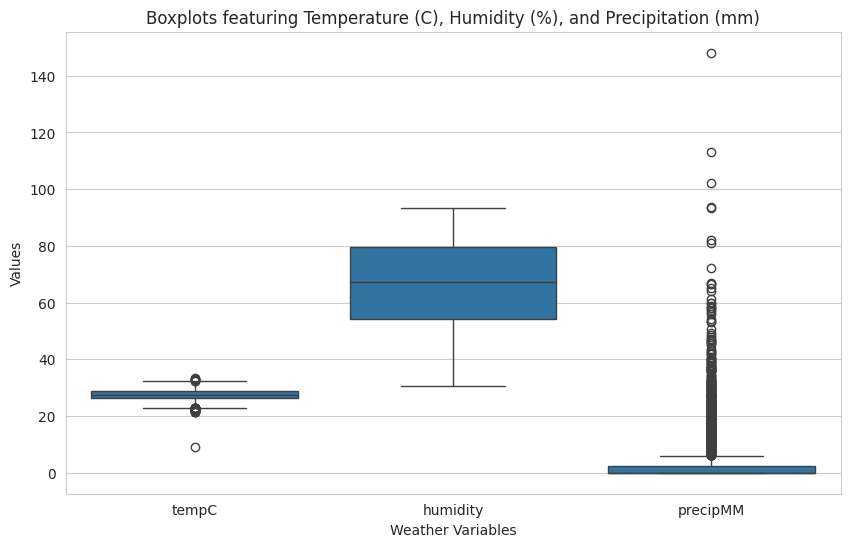

In [22]:
data1 = cd[['tempC', 'humidity', 'precipMM']]
data_melted = data1.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=data_melted)

plt.title('Boxplots featuring Temperature (C), Humidity (%), and Precipitation (mm)')
plt.xlabel('Weather Variables')
plt.ylabel('Values')
plt.show()

####Year Wise Average Temperature for all Months

In [23]:
cd.reset_index(inplace=True)

In [24]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd['year'] = cd['date_time'].dt.year
cd['month'] = cd['date_time'].dt.month
cd['hour'] = cd['date_time'].dt.hour

monthly_avg_temperature = cd.groupby(['year', 'month'])['tempC'].mean().reset_index()
monthly_avg_temperature.columns = ['Year', 'Month', 'Avg_Temperature']
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_avg_temperature['Month'] = monthly_avg_temperature['Month'].map(month_dict)
monthly_avg_temperature=monthly_avg_temperature.drop(132)

In [25]:
import warnings
warnings.filterwarnings("ignore")
px.scatter(monthly_avg_temperature, x="Month", y="Avg_Temperature", animation_frame="Year",
           size="Avg_Temperature", color="Avg_Temperature", hover_name="Avg_Temperature", range_y=[10,40])

####Gamma Distribution Fit for Rain

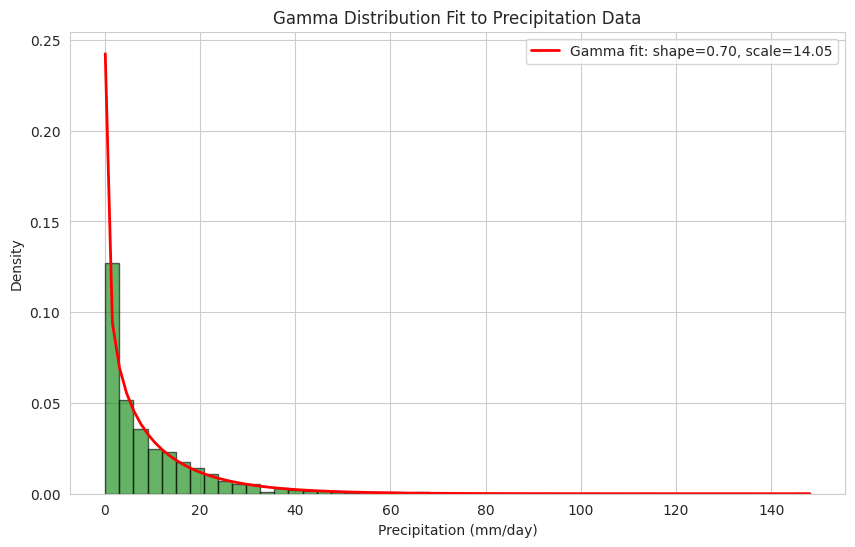

In [26]:
import scipy.stats as stats
precip_data = cd['precipMM'][cd['precipMM'] > 0]
shape, loc, scale = stats.gamma.fit(precip_data, floc=0)
plt.figure(figsize=(10, 6))
plt.hist(precip_data, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

x = np.linspace(precip_data.min(), precip_data.max(), 100)
gamma_pdf = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_pdf, 'r-', lw=2, label=f'Gamma fit: shape={shape:.2f}, scale={scale:.2f}')
plt.title('Gamma Distribution Fit to Precipitation Data')
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Density')
plt.legend()
plt.show()


####PDF Plot Temperature

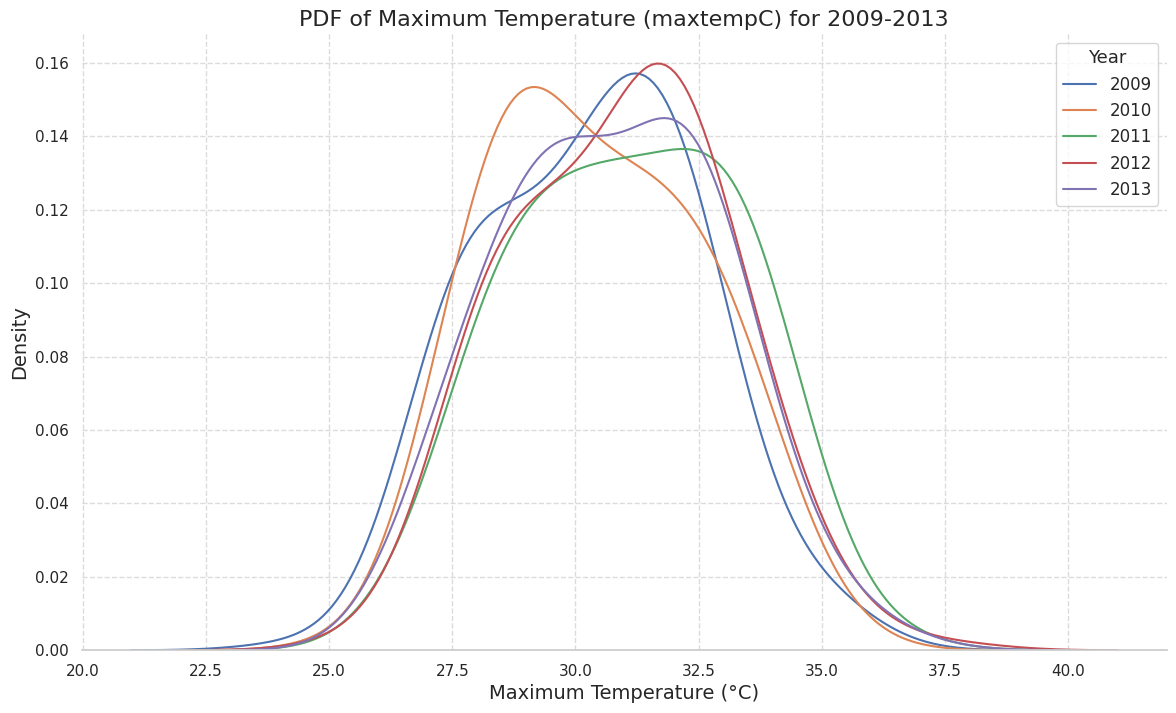

In [27]:
cd.reset_index(inplace=True)
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd['year'] = cd['date_time'].dt.year
filtered_data = cd[(cd['year'] >= 2009) & (cd['year'] <= 2013)]
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

for year, group in filtered_data.groupby('year'):
    sns.kdeplot(group['maxtempC'].dropna(), fill=False, bw_adjust=1.5, label=str(year))

plt.title('PDF of Maximum Temperature (maxtempC) for 2009-2013', fontsize=16)
plt.xlabel('Maximum Temperature (°C)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Year', fontsize=12, title_fontsize='13')
sns.despine(left=True)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


###Pre Processing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [29]:
cd = daily_data.copy()

In [30]:
cd['date_time'] = pd.to_datetime(cd.index)

###Model Training and Testing

In [31]:
cd['month'] = cd['date_time'].dt.month
cd['year'] = cd['date_time'].dt.year
cd['day'] = cd['date_time'].dt.day
cd['dayofweek'] = cd['date_time'].dt.dayofweek

####Changing Time Features to Minutes

In [32]:
cd['moonrise'] = pd.to_datetime(data['moonrise'], format='%I:%M %p', errors='coerce').dt.time
cd['moonset'] = pd.to_datetime(data['moonset'], format='%I:%M %p', errors='coerce').dt.time
cd['sunrise'] = pd.to_datetime(data['sunrise'], format='%I:%M %p', errors='coerce').dt.time
cd['sunset'] = pd.to_datetime(data['sunset'], format='%I:%M %p', errors='coerce').dt.time

def time_to_minutes(time):
    return time.hour * 60 + time.minute

cd['moonrise_minutes'] = cd['moonrise'].apply(time_to_minutes)
cd['moonset_minutes'] = cd['moonset'].apply(time_to_minutes)
cd['sunrise_minutes'] = cd['sunrise'].apply(time_to_minutes)
cd['sunset_minutes'] = cd['sunset'].apply(time_to_minutes)

cd = cd.drop(columns=['moonrise', 'moonset', 'sunrise', 'sunset'])

In [33]:
cd = cd.dropna()

In [34]:
print(cd.columns)

Index(['maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'uvIndex.1',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'year', 'Year', 'Month', 'date_time', 'month', 'day', 'dayofweek',
       'moonrise_minutes', 'moonset_minutes', 'sunrise_minutes',
       'sunset_minutes'],
      dtype='object')


In [35]:
X = cd.drop(columns=['precipMM', 'date_time'])
y = cd['precipMM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['maxtempC', 'mintempC', 'sunHour',
       'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
        'moonrise_minutes', 'moonset_minutes','sunrise_minutes',
          'sunset_minutes','year','month', 'day', 'dayofweek' ]
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),  ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

In [36]:
print(cd.columns)

Index(['maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'uvIndex.1',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'year', 'Year', 'Month', 'date_time', 'month', 'day', 'dayofweek',
       'moonrise_minutes', 'moonset_minutes', 'sunrise_minutes',
       'sunset_minutes'],
      dtype='object')


In [37]:
models = {
    'Support Vector Regressor': SVR(),
    'MLP Regressor NN': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}
results = {}
best_model_name = None
best_r2 = -float('inf')
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', model)])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.maximum(y_pred, 0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}
    models = {}
    models[name] = clf

    print(f'Model: {name}')
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Square Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print('-'*30)

    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name

print(f"Best Model: {best_model_name}")
print(f"Best Model R-squared: {best_r2:.4f}")

Model: Support Vector Regressor
Mean Absolute Error: 1.3364
Mean Squared Error: 20.6131
Root Mean Square Error: 4.5402
R-squared: 0.7438
------------------------------
Model: MLP Regressor NN
Mean Absolute Error: 1.1448
Mean Squared Error: 10.2010
Root Mean Square Error: 3.1939
R-squared: 0.8732
------------------------------
Model: Random Forest
Mean Absolute Error: 0.9393
Mean Squared Error: 6.4969
Root Mean Square Error: 2.5489
R-squared: 0.9193
------------------------------
Best Model: Random Forest
Best Model R-squared: 0.9193


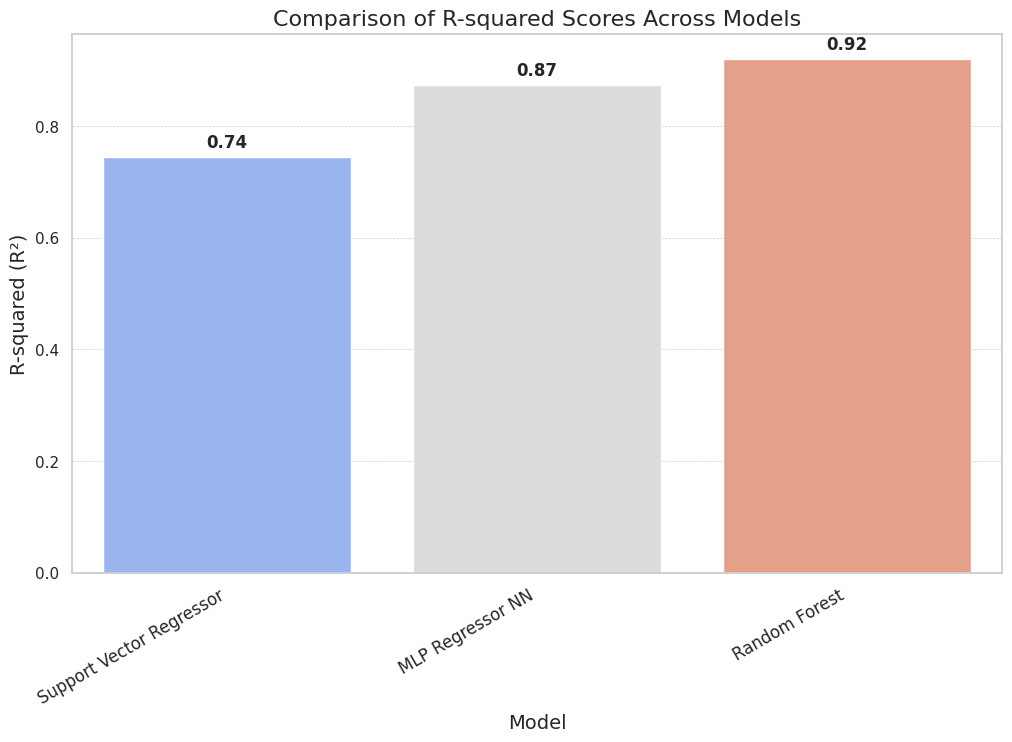

In [38]:
model_names = list(results.keys())
r2_scores = [results[model]['r2'] for model in model_names]

sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(model_names))
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=model_names, y=r2_scores, palette=palette)
plt.title('Comparison of R-squared Scores Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R-squared (R²)', fontsize=14)

plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
for index, value in enumerate(r2_scores):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=30, ha='right', fontsize=12)
plt.show()


###Hyperparameter Tuning - Random Forest Model

In [39]:
param_dist_rf = {
    'n_estimators': [100, 200, 500, 1000, 1500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor()
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', random_search_rf)])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest R-squared: 0.9007


##Time Series Analysis

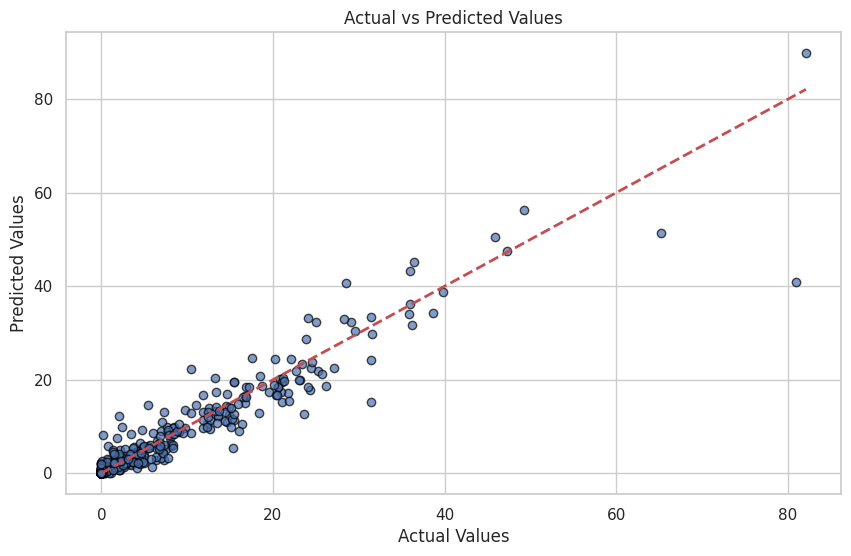

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

####Time Series for Test and Predicted Values

In [60]:
model = models['Random Forest']

In [61]:
X_test.sort_index(inplace=True)
y_test.sort_index(inplace=True)

In [62]:
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)

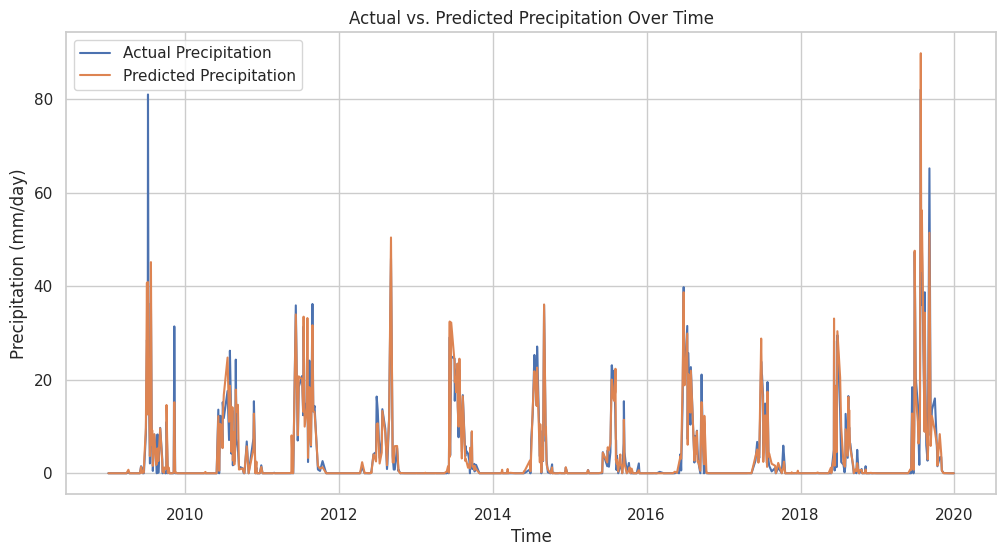

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Precipitation')
plt.plot(y_test.index, y_pred, label='Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Actual vs. Predicted Precipitation Over Time')
plt.legend()
plt.grid(True)
plt.show()

####Time Series for Actual vs Predicted showing Seasonal(June-September) for particular Year

In [64]:
temp = cd[cd['year']== 2013]
season = temp[temp['month'].isin([6, 7, 8, 9])]
test = season['precipMM']
season = season.drop(['precipMM'], axis=1)

In [65]:
season.sort_index(inplace=True)
test.sort_index(inplace=True)

In [66]:
pred = model.predict(season)
pred = np.maximum(pred, 0)

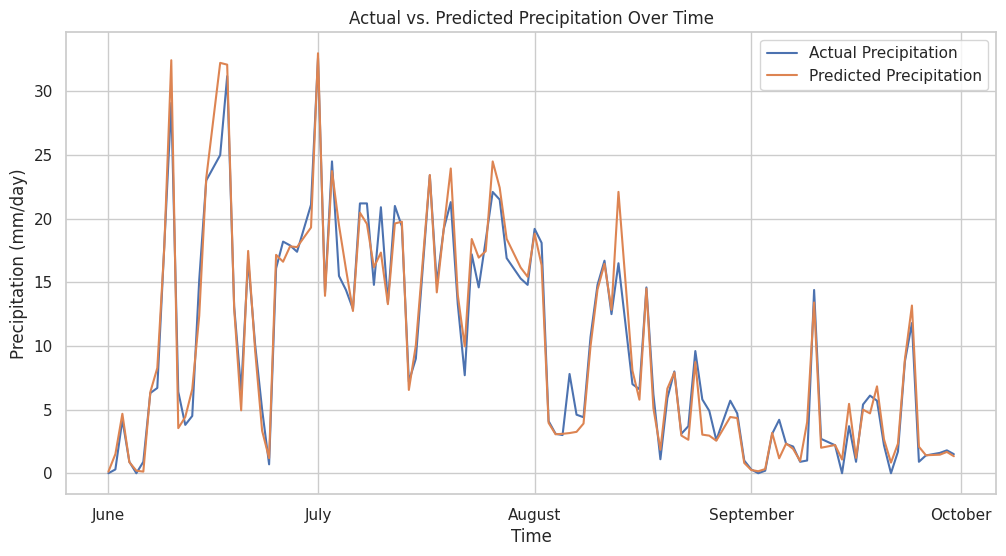

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Precipitation')
plt.plot(test.index, pred, label='Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Actual vs. Predicted Precipitation Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.legend()
plt.grid(True)
plt.show()

####Time Series for Annual Rain showing Actual vs Predicted Values

In [68]:
cd.sort_index(inplace=True)

In [69]:
x = cd.drop(['precipMM'], axis=1)
y = cd['precipMM']

In [70]:
ann_pred = model.predict(x)

In [71]:
ann_pred = np.maximum(ann_pred, 0)

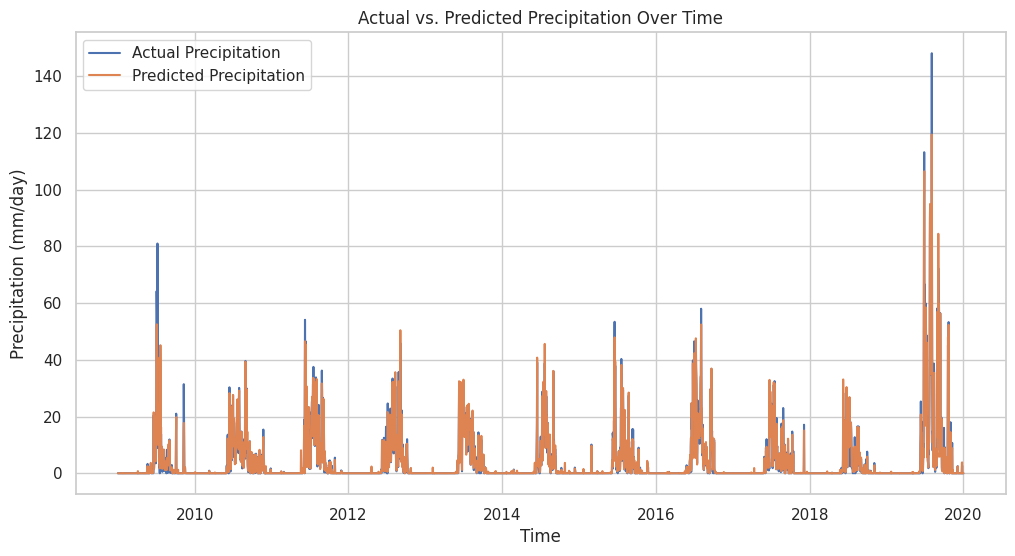

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual Precipitation')
plt.plot(y.index, ann_pred, label='Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Actual vs. Predicted Precipitation Over Time')
plt.legend()
plt.grid(True)
plt.show()